## Assignment 1: Linear Regression [30 pt]

In [262]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [263]:
# Load the diabetes dataset
data = load_diabetes()
X = data.data
y = data.target

# Split the dataset into training and testing sets
# You may use train_test_split in sklearn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error for evaluation
mse = mean_squared_error(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)

# Interpret the coefficients
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)


Mean Squared Error: 3424.259334298691
Coefficients: [ -35.55025079 -243.16508959  562.76234744  305.46348218 -662.70290089
  324.20738537   24.74879489  170.3249615   731.63743545   43.0309307 ]
Intercept: 152.5380470138517


Write up: 

Each coefficient represents the impact of a particular feature on diabetes progression. Positive coefficients here indicate a positive relationship that is as the feature increases, diabetes progression tends to increase, while the negative coefficients indicate a negative relationship that is as the feature increases, diabetes progression tends to decrease. The magnitude of the coefficient represents the strength of the relationship.

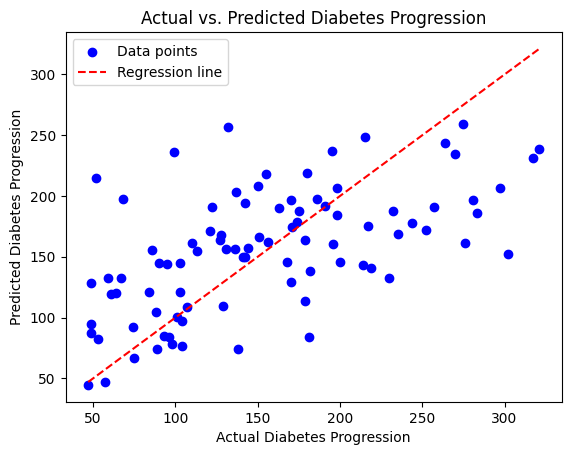

In [264]:
# Visualize the model's performance with the regression line
plt.scatter(y_test, y_pred, color='blue', label='Data points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Regression line')
plt.xlabel('Actual Diabetes Progression')
plt.ylabel('Predicted Diabetes Progression')
plt.title('Actual vs. Predicted Diabetes Progression')
plt.legend()
plt.show()


## Assignment 2: Logistic Regression [40 pt]

In [265]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [266]:
# Load the Breast Cancer Wisconsin dataset
data = load_breast_cancer()
X = data.data
y = data.target

In [267]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [268]:
# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [269]:
import numpy as np
# Implement Logistic Regression algorithm
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression(X, y, learning_rate, num_iterations):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0
    
    for _ in range(num_iterations):
        
        # get the prediction from the model, update the parameters.
        linear_model = np.dot(X, weights) + bias
        predictions = sigmoid(linear_model)

        #Find the gradient descent
        dw = (1/n_samples) * np.dot(X.T, (predictions - y)) # Here X.T is the transpose of Data matrix X
        db = (1/n_samples) * np.sum(predictions - y)
        
        # Update the parameters using gradient descent
        weights -= learning_rate * dw
        bias -= learning_rate * db
    
    return weights, bias

# Train Logistic Regression model
learning_rate = 0.01
num_iterations = 1000
weights, bias = logistic_regression(X_train_scaled, y_train, learning_rate, num_iterations)

# Predict class labels using trained model
def predict(X, weights, bias):
    linear_model = np.dot(X, weights) + bias
    predictions = sigmoid(linear_model)
    # Convert probabilities to binary predictions (0 or 1)
    return [1 if x >= 0.5 else 0 for x in predictions] 


Code Explanation: 

The logistic_regression function written above implements logistic regression using gradient descent to update the weights and bias.

In the predict function, we calculate the linear model, pass it through the sigmoid function to get probabilities, and then convert these probabilities to binary predictions (0 or 1) based on a threshold of 0.5.

In [270]:
y_pred = predict(X_test_scaled, weights, bias)

# Evaluate the model's performance
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.9859154929577465
Recall: 0.9859154929577465
F1 Score: 0.9859154929577465


Write up: 

Following is the interpretation of above results:

Precision measures how many of the predicted positive instances are actually true positives.So based on above score we can say that 98.59% of the instances predicted as malignant by the model were indeed malignant.

Recall measures how many of the actual positive instances were correctly predicted by the model.Thus the model correctly identified 98.59% of the actual malignant cases in the dataset.

The F1 Score is the harmonic mean of precision and recall. It provides a single score that balances both precision and recall. An F1 score of 0.9859 indicates a very balanced performance between precision and recall. It suggests that the model is doing well in both correctly identifying malignant cases and avoiding false positives.

## Assignment 3: K-Means [30 pt]

In [271]:
from sklearn.datasets import load_iris

In [272]:
# Load the Iris dataset
data = load_iris()
X = data.data

In [273]:
import numpy as np
# Implement K-Means algorithm
def kmeans(X, k, max_iters=100):
    n_samples, n_features = X.shape
    centroids = X[np.random.choice(n_samples, k, replace=False)]
    
    for _ in range(max_iters):
        # Assign each data point to the nearest centroid
        distances = np.linalg.norm(X[:, np.newaxis, :] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        # Update centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        
        # Check for convergence
        if np.all(new_centroids == centroids):
            break
        
        centroids = new_centroids
    return labels,centroids

In [274]:
# Apply K-Means with k=3 (since there are three species of iris)
k = 3
labels, centroids = kmeans(X, k)

Write Up :

The Iris dataset stored in data matrix X consists of measurements of four features (sepal length, sepal width, petal length, and petal width) of three different species of iris flowers (setosa, versicolor, and virginica).

K-means is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.

Initially I assigned random data points as centroids, later I calculated Euclidean distance between each data point in X and all centroids as follows:
 
  1. X[:, np.newaxis, :] broadcasts the data points along a new axis, making it a 3D array. It's done to facilitate the element-wise subtraction of centroids from each data point.

  2. Then I subtract each centroid from each data point element-wise. 

  3. np.linalg.norm(..., axis=2) is used to calculate the Euclidean norm (distance) along the third axis, resulting in a 2D array where each row contains the distances between a data point and all centroids.


np.argmin(distances, axis=1) finds the index of the centroid with the smallest distance for each data point along the rows.

As seen in the final figure below, I have plotted the clusters and their corresponding centroid is marked with a red cross.

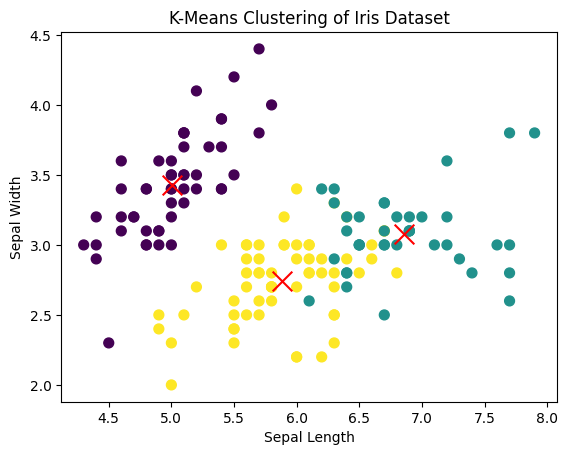

In [275]:
# Visualize the clustered data points and centroids

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', s=50, label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('K-Means Clustering of Iris Dataset')
plt.show()